In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('amazon_india_2019.csv')
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2019_00000001,2019-01-05,CUST_2019_00037860,PROD_001930,Fitbit Sports Watch Premium,Electronics,Smart Watch,Fitbit,29122.09,0.00,29122.09,2.0,58244.18,0.0,58244.18,Kolkata,West Bengal,Metro,Standard,26-35,UPI,5,Standard,False,False,NaN,3.0,Delivered,1.0,2019.0,1.0,0.06,True,3.4
1,TXN_2019_00000002,2019-01-09,CUST_2019_00002481,PROD_001683,Apple Mi Pad 8GB RAM Silver,Electronics,Tablets,Apple,66396.45,0.00,66396.45,1.0,66396.45,NaN,66396.45,Bangalore,Karnataka,Metro,Standard,18-25,COD,1,Same Day,True,False,NaN,3.5,Delivered,1.0,2019.0,1.0,0.40,True,4.5
2,TXN_2019_00000003,01/02/2019,CUST_2018_00031347,PROD_000460,Oppo F9 64GB Black,Electronics,Smartphones,Oppo,29966.28,0.00,29966.28,1.0,29966.28,0.0,29966.28,Kolkata,West Bengal,Metro,Standard,18-25,UPI,Same Day,Same Day,True,False,NaN,5.0,Delivered,1.0,2019.0,1.0,0.16,True,3.3
3,TXN_2019_00000004,2019-01-22,CUST_2019_00024783,PROD_000633,Oppo Reno 64GB White,Electronics,Smartphones,Oppo,34225.21,19.68,27490.26,3.0,82470.78,0.0,82470.78,Lucknow,Uttar Pradesh,Tier1,Budget,26-35,COD,1,Same Day,True,True,Republic Day Sale,4.5,Delivered,1.0,2019.0,1.0,0.20,True,3.3
4,TXN_2019_00000005,2019-01-31,CUST_2019_00018471,PROD_000571,Xiaomi Mi A3 256GB Blue,Electronics,Smartphones,Xiaomi,27092.49,0.00,27092.49,2.0,54184.98,0.0,54184.98,Kanpur,Uttar Pradesh,Tier1,Budget,46-55,COD,3,Standard,False,False,NaN,NaN,Returned,1.0,2019.0,1.0,0.25,True,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38426,TXN_2019_00038427,2019-05-08,CUST_2015_00004801,PROD_001545,Dell Aspire 4GB RAM Black,Electronics,Laptops,Dell,184313.94,61.07,71761.11,1.0,71761.11,0.0,71761.11,Bangalore,Karnataka,Metro,Premium,26-35,COD,3,Standard,False,True,Summer Sale,NaN,Delivered,5.0,2019.0,2.0,2.26,False,3.6
38427,TXN_2019_00038428,2019-05-01,CUST_2018_00025841,PROD_000616,Vivo S1 128GB White,Electronics,Smartphones,Vivo,40039.88,33.84,26489.38,1.0,26489.38,0.0,26489.38,Lucknow,Uttar Pradesh,Tier1,Standard,18-25,Credit Card,3,Standard,False,True,Summer Sale,4.0 stars,Delivered,5.0,2019.0,2.0,0.19,False,4.4
38428,TXN_2019_00038429,2019-05-20,CUST_2019_00013498,PROD_001680,Apple Tab M10 4GB RAM Silver,Electronics,Tablets,Apple,34390.07,0.00,34390.07,1.0,34390.07,0.0,34390.07,Mumbai,Maharashtra,Metro,Budget,36-45,COD,6,Standard,False,False,NaN,4.5,Delivered,5.0,2019.0,2.0,0.66,True,4.2
38429,TXN_2019_00038430,2019-05-06,CUST_2019_00021206,PROD_000415,Xiaomi Mi A2 64GB White,Electronics,Smartphones,Xiaomi,44351.92,51.59,21472.04,1.0,21472.04,0.0,21472.04,Kanpur,Uttar Pradesh,Tier1,Standard,26-35,COD,5,Standard,False,True,Summer Sale,NaN,Delivered,5.0,2019.0,2.0,0.20,True,4.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38431 entries, 0 to 38430
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          38431 non-null  object 
 1   order_date              38431 non-null  object 
 2   customer_id             38431 non-null  object 
 3   product_id              38431 non-null  object 
 4   product_name            38431 non-null  object 
 5   category                38431 non-null  object 
 6   subcategory             38430 non-null  object 
 7   brand                   38430 non-null  object 
 8   original_price_inr      38430 non-null  object 
 9   discount_percent        38430 non-null  float64
 10  discounted_price_inr    38430 non-null  float64
 11  quantity                38430 non-null  float64
 12  subtotal_inr            38430 non-null  float64
 13  delivery_charges        35339 non-null  float64
 14  final_amount_inr        38430 non-null

#Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [ ]:
df['order_date']=df['order_date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['order_date']

,order_date
0,2019-01-05
1,2019-01-09
2,01/02/2019
3,2019-01-22
4,2019-01-31
...,...
38426,2019-05-08
38427,2019-05-01
38428,2019-05-20
38429,2019-05-06


In [ ]:
df['order_date'].isnull().sum()

np.int64(0)

In [ ]:
mask = df['order_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')

df.loc[mask,'order_date']=pd.to_datetime(df.loc[mask, 'order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2019-01-05 00:00:00
1,2019-01-09 00:00:00
2,01/02/2019
3,2019-01-22 00:00:00
4,2019-01-31 00:00:00
...,...
38426,2019-05-08 00:00:00
38427,2019-05-01 00:00:00
38428,2019-05-20 00:00:00
38429,2019-05-06 00:00:00


In [ ]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2019-01-05
1,2019-01-09
2,NaT
3,2019-01-22
4,2019-01-31
...,...
38426,2019-05-08
38427,2019-05-01
38428,2019-05-20
38429,2019-05-06


#Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [ ]:
df['original_price_inr']=df['original_price_inr'].str.replace(r'[^\d.]','',regex=True)
df['original_price_inr']=df['original_price_inr'].astype('float')
df['original_price_inr']

,original_price_inr
0,29122.09
1,66396.45
2,29966.28
3,34225.21
4,27092.49
...,...
38426,184313.94
38427,40039.88
38428,34390.07
38429,44351.92


In [ ]:
df['original_price_inr'].isnull().sum()

np.int64(1)

#Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [ ]:
df['customer_rating'].unique()

array(['3.0', '3.5', '5.0', '4.5', nan, '4.0', '4.5 stars', '4',
       '4.0 stars', '4/5', '4.0/5.0', '3/5', '3.5 stars', '5.0 stars',
       '5.0/5.0', '5', '4.5/5.0', '5/5', '3.5/5.0', '3.0 stars', '3',
       '3.0/5.0'], dtype=object)

In [ ]:
df['customer_rating']=df['customer_rating'].str.replace(r'[\/ ].*','',case=False,regex=True).str.strip()

In [ ]:
df['customer_rating'].isnull().sum()

np.int64(11479)

In [ ]:
df['customer_rating']=df['customer_rating'].replace('',np.nan)

In [ ]:
df['customer_rating']=df['customer_rating'].astype(float)

In [ ]:
df['customer_rating']

,customer_rating
0,3.0
1,3.5
2,5.0
3,4.5
4,NaN
...,...
38426,NaN
38427,4.0
38428,4.5
38429,NaN


In [ ]:
df['customer_rating'].isnull().sum()

np.int64(11479)

In [ ]:
df['customer_rating'].mean()
# df['customer_rating'].median()
# df['customer_rating'].mode()

np.float64(4.317193529237162)

In [ ]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [ ]:
df['customer_rating'].isnull().sum()

np.int64(0)

#Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [ ]:
df['customer_city'].unique()

array(['Kolkata', 'Bangalore', 'Lucknow', 'Kanpur', 'Indore', 'Nagpur',
       'Delhi', 'Mumbai', 'Patna', 'Jaipur', 'Saharanpur', 'Vadodara',
       'Kochi', 'Visakhapatnam', 'Bareilly', 'Moradabad', 'Surat',
       'Ahmedabad', 'Chennai', 'Hyderabad', 'Bhubaneswar', 'Chandigarh',
       'Pune', 'Ludhiana', 'Coimbatore', 'Gorakhpur', 'Allahabad',
       'Meerut', 'Madras', 'Aligarh', 'Varanasi', 'CHENNAI', 'kolkata',
       'Chennai ', 'New Delhi', 'chenai', 'KOLKATA', 'Mumbai ', 'mumba',
       'MUMBAI', 'DELHI', 'Calcutta', 'Delhi NCR', 'Kolkata ', 'Bombay',
       'Bengaluru', 'Bengalore', 'BANGALORE', 'delhi', 'Banglore', nan],
      dtype=object)

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import process  # pip install thefuzz

def clean_city_names(df, column):

    manual_mapping = {
        # Mumbai
        'bombay': 'Mumbai',
        'mumba': 'Mumbai',
        'mumbai ': 'Mumbai',
        'mumabi': 'Mumbai',

        # Bengaluru
        'bangalore': 'Bengaluru',
        'banglore': 'Bengaluru',
        'bengalore': 'Bengaluru',

        # Delhi
        'new delhi': 'Delhi',
        'delhi ncr': 'Delhi',
        'delhi ': 'Delhi',

        # Chennai
        'madras': 'Chennai',
        'chenai': 'Chennai',
        'chennai ': 'Chennai',

        # Kolkata
        'calcutta': 'Kolkata',
        'kolkata ': 'Kolkata',
        'kolkata': 'Kolkata',  # lowercase variant
        'kolkatta': 'Kolkata',
    }

    master_list= [
        'Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Kochi', 'Mumbai',
        'Kanpur', 'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore',
        'Ahmedabad', 'Chennai', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
        'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
        'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly', 'Saharanpur',
        'Allahabad'
    ]
    master_list_lower = [c.lower() for c in master_list]


    df[column] = df[column].astype(str).str.lower().str.strip()
    df[column] = df[column].replace({"nan": pd.NA})

    df[column] = df[column].replace(manual_mapping)

    def match_city(city):
        if pd.isna(city):
            return city
        best_match, score = process.extractOne(city, master_list_lower)
        return best_match if score > 85 else city

    df[column] = df[column].apply(match_city)


    df[column] = df[column].apply(lambda x: x.title() if pd.notna(x) else x)

    return df[column]


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# Get unique city names
unique_cities = df['customer_city'].unique()

# Apply the cleaning function to unique city names
cleaned_unique_cities = [clean_city_names(pd.DataFrame({'city': [city]}), 'city').iloc[0] for city in unique_cities]

# Create a mapping dictionary
city_mapping = dict(zip(unique_cities, cleaned_unique_cities))

# Map the cleaned names back to the original column
df['customer_city'] = df['customer_city'].map(city_mapping)

display(df['customer_city'].unique())

array(['Kolkata', 'Bengaluru', 'Lucknow', 'Kanpur', 'Indore', 'Nagpur',
       'Delhi', 'Mumbai', 'Patna', 'Jaipur', 'Saharanpur', 'Vadodara',
       'Kochi', 'Visakhapatnam', 'Bareilly', 'Moradabad', 'Surat',
       'Ahmedabad', 'Chennai', 'Hyderabad', 'Bhubaneswar', 'Chandigarh',
       'Pune', 'Ludhiana', 'Coimbatore', 'Gorakhpur', 'Allahabad',
       'Meerut', 'Aligarh', 'Varanasi', <NA>], dtype=object)

In [ ]:
df['customer_city'].unique()

array(['Kolkata', 'Bengaluru', 'Lucknow', 'Kanpur', 'Indore', 'Nagpur',
       'Delhi', 'Mumbai', 'Patna', 'Jaipur', 'Saharanpur', 'Vadodara',
       'Kochi', 'Visakhapatnam', 'Bareilly', 'Moradabad', 'Surat',
       'Ahmedabad', 'Chennai', 'Hyderabad', 'Bhubaneswar', 'Chandigarh',
       'Pune', 'Ludhiana', 'Coimbatore', 'Gorakhpur', 'Allahabad',
       'Meerut', 'Aligarh', 'Varanasi', <NA>], dtype=object)

#Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [ ]:
df['is_prime_member'].unique()

array(['False', 'True', 'No', 'FALSE', '1', 'Yes', '0', 'TRUE', nan],
      dtype=object)

In [ ]:
df['is_prime_eligible'].unique()

array(['True', 'False', '1', 'TRUE', 'Yes', '0', 'No', 'FALSE', nan],
      dtype=object)

In [ ]:
df['is_festival_sale'].unique()

array(['False', 'True', 'FALSE', 'Yes', 'No', 'TRUE', '0', '1', nan],
      dtype=object)

In [ ]:
import pandas as pd

def make_true_false(x):

    if pd.isna(x):
        return pd.NA

    x = str(x).strip().upper()

    if x in ['NAN', 'NONE', 'NULL', '']:
        return pd.NA

    if x in ['NO', 'FALSE', '0']:
        return False
    elif x in ['YES', 'TRUE', '1']:
        return True

    return pd.NA


In [ ]:
df['is_festival_sale']=df['is_festival_sale'].apply(make_true_false)
df['is_prime_eligible']=df['is_prime_eligible'].apply(make_true_false)
df['is_prime_member']=df['is_prime_member'].apply(make_true_false)

In [ ]:
print(df['is_festival_sale'].unique())
print(df['is_prime_eligible'].unique())
print(df['is_prime_member'].unique())

[False True <NA>]
[True False <NA>]
[False True <NA>]


#Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [ ]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories', 'Electronic',
       'ELECTRONICS', 'Electronicss', 'Electroni'], dtype=object)

In [ ]:
mapping_cat = {
    'electronics': 'Electronics',
    'electronic': 'Electronics',
    # 'Electronics & Accessories': 'Electronics',
    'ELECTRONICS':'Electronics',
    'Electronic':'Electronics',
    'Electronicss':'Electronics'

}

In [ ]:
df['category']=df['category'].replace(mapping_cat)

In [ ]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories', 'Electroni'],
      dtype=object)

#Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [ ]:
df['delivery_days'].unique()

array(['5', '1', 'Same Day', '3', '6', '4', '2', '7', '15', '-1',
       'Express', '1-2 days', '0', nan], dtype=object)

In [ ]:
df.loc[df['delivery_days'].str.contains(r'[1-2|same day]',case=False,na=False),'delivery_days'].sample(10)

,delivery_days
21702,1
28543,1
32719,1
28597,2
18917,1
18450,2
37092,Same Day
25658,2
10878,2
14627,1


In [ ]:
df['delivery_days']=df['delivery_days'].str.replace('1-2','2',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Same Day','1',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Express','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('-','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('2 days','2',case=False)

In [ ]:
df['delivery_days'] = df['delivery_days'].replace('', np.nan)
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
display(df['delivery_days'].unique())

array([ 5.,  1.,  3.,  6.,  4.,  2.,  7., 15., nan,  0.])

In [ ]:
df['delivery_days'].isnull().sum()

np.int64(91)

In [ ]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].mean()).astype(int)

In [ ]:
df['delivery_days'].isnull().sum()


np.int64(0)

In [ ]:
df['delivery_days'].head()

,delivery_days
0,5
1,1
2,1
3,1
4,3


#Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [ ]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


In [ ]:
df=df.drop_duplicates(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'],keep='first')

In [ ]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


#Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [ ]:
df.loc[:,['product_name','original_price_inr']]

,product_name,original_price_inr
0,Fitbit Sports Watch Premium,29122.09
1,Apple Mi Pad 8GB RAM Silver,66396.45
2,Oppo F9 64GB Black,29966.28
3,Oppo Reno 64GB White,34225.21
4,Xiaomi Mi A3 256GB Blue,27092.49
...,...,...
38426,Dell Aspire 4GB RAM Black,184313.94
38427,Vivo S1 128GB White,40039.88
38428,Apple Tab M10 4GB RAM Silver,34390.07
38429,Xiaomi Mi A2 64GB White,44351.92


In [ ]:
df['original_price_inr']

,original_price_inr
0,29122.09
1,66396.45
2,29966.28
3,34225.21
4,27092.49
...,...
38426,184313.94
38427,40039.88
38428,34390.07
38429,44351.92


<Axes: >

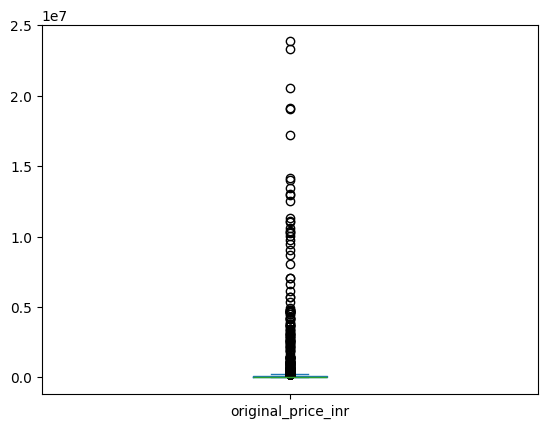

In [ ]:
df['original_price_inr'].plot(kind='box')

In [ ]:
df['original_price_inr'].describe()

,original_price_inr
count,3.843000e+04
mean,8.501344e+04
std,3.939629e+05
min,2.228160e+03
25%,3.102580e+04
50%,4.706525e+04
75%,1.022060e+05
max,2.385536e+07


In [ ]:
Q1=df['original_price_inr'].quantile(0.25)
Q3=df['original_price_inr'].quantile(0.75)
Q3,Q1

(np.float64(102205.96), np.float64(31025.8))

In [ ]:
IQR=Q3-Q1
IQR

np.float64(71180.16)

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [ ]:
lower_limit,upper_limit

(np.float64(-75744.44), np.float64(208976.2))

In [ ]:
df[((df['original_price_inr'] < lower_limit) | (df['original_price_inr'] > upper_limit))]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
49,TXN_2019_00000050,2019-01-31,CUST_2019_00029607,PROD_000495,Apple iPhone 11 Pro 128GB Blue,Electronics,Smartphones,Apple,209887.51,0.00,209887.51,1.0,209887.51,0.0,209887.51,Mumbai,Maharashtra,Metro,Premium,18-25,Debit Card,1,Same Day,True,False,NaN,4.500000,Delivered,1.0,2019.0,1.0,0.16,True,3.2
140,TXN_2019_00000141,2019-01-23,CUST_2018_00011759,PROD_000214,Apple iPhone 8 16GB Black,Electronics,Smartphones,Apple,233946.64,36.44,148701.90,2.0,297403.79,0.0,297403.79,Bengaluru,Karnataka,Metro,Premium,26-35,COD,5,Standard,False,True,Republic Day Sale,4.000000,Delivered,1.0,2019.0,1.0,0.23,True,3.8
222,TXN_2019_00000223,2019-01-08,CUST_2018_00004009,PROD_001997,LG 4K TV,Electronics,TV & Entertainment,LG,238553.58,0.00,238553.58,1.0,238553.58,NaN,238553.58,Chennai,Tamil Nadu,Metro,Premium,18-25,Credit Card,4,Standard,False,False,NaN,4.317194,Delivered,1.0,2019.0,1.0,24.86,True,4.1
226,TXN_2019_00000227,NaT,CUST_2018_00022971,PROD_001612,Apple Pavilion 8GB RAM Silver,Electronics,Laptops,Apple,6610255.00,0.00,66102.55,3.0,198307.65,0.0,198307.65,Chennai,Tamil Nadu,Metro,Premium,46-55,UPI,3,Standard,False,False,NaN,5.000000,Delivered,1.0,2019.0,1.0,2.69,True,3.7
234,TXN_2019_00000235,2019-01-27,CUST_2016_00006837,PROD_000342,Apple iPhone XS 64GB Black,Electronics,Smartphones,Apple,237551.90,12.60,207621.63,2.0,415243.26,0.0,415243.26,Mumbai,Maharashtra,Metro,Premium,18-25,COD,5,Standard,False,False,NaN,5.000000,Delivered,1.0,2019.0,1.0,0.19,False,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38330,TXN_2019_00038331,2019-05-20,CUST_2019_00006672,PROD_000015,Apple iPhone 6 Plus 16GB Blue,Electronics,Smartphones,Apple,216891.14,0.00,216891.14,1.0,216891.14,0.0,216891.14,Mumbai,Maharashtra,Metro,Premium,18-25,Credit Card,1,Same Day,True,False,NaN,4.500000,Delivered,5.0,2019.0,2.0,0.20,False,4.1
38358,TXN_2019_00038359,2019-05-17,CUST_2019_00031447,PROD_001892,Samsung Tracker Premium,Electronics,Smart Watch,Samsung,3065647.00,24.42,23171.50,1.0,23171.50,0.0,23171.50,Ludhiana,Punjab,Tier2,Standard,36-45,Credit Card,4,Standard,False,False,NaN,3.500000,Delivered,5.0,2019.0,2.0,0.06,True,3.5
38363,TXN_2019_00038364,2019-05-20,CUST_2018_00014932,PROD_000017,Apple iPhone 5s 16GB Black,Electronics,Smartphones,Apple,219778.44,0.00,219778.44,1.0,219778.44,0.0,219778.44,Kolkata,West Bengal,Metro,Premium,18-25,COD,2,Express,True,False,NaN,4.500000,Delivered,5.0,2019.0,2.0,0.17,True,3.2
38385,TXN_2019_00038386,2019-05-25,CUST_2019_00015244,PROD_000118,Apple iPhone 7 Plus 32GB White,Electronics,Smartphones,Apple,239272.95,0.00,239272.95,1.0,239272.95,0.0,239272.95,Mumbai,Maharashtra,Metro,Premium,55+,UPI,3,Standard,False,False,NaN,5.000000,Delivered,5.0,2019.0,2.0,0.19,False,4.1


In [ ]:
df=df[(df['original_price_inr']>=lower_limit)&(df['original_price_inr']<=upper_limit)]

In [ ]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2019_00000001,2019-01-05,CUST_2019_00037860,PROD_001930,Fitbit Sports Watch Premium,Electronics,Smart Watch,Fitbit,29122.09,0.00,29122.09,2.0,58244.18,0.0,58244.18,Kolkata,West Bengal,Metro,Standard,26-35,UPI,5,Standard,False,False,NaN,3.000000,Delivered,1.0,2019.0,1.0,0.06,True,3.4
1,TXN_2019_00000002,2019-01-09,CUST_2019_00002481,PROD_001683,Apple Mi Pad 8GB RAM Silver,Electronics,Tablets,Apple,66396.45,0.00,66396.45,1.0,66396.45,NaN,66396.45,Bengaluru,Karnataka,Metro,Standard,18-25,COD,1,Same Day,True,False,NaN,3.500000,Delivered,1.0,2019.0,1.0,0.40,True,4.5
2,TXN_2019_00000003,NaT,CUST_2018_00031347,PROD_000460,Oppo F9 64GB Black,Electronics,Smartphones,Oppo,29966.28,0.00,29966.28,1.0,29966.28,0.0,29966.28,Kolkata,West Bengal,Metro,Standard,18-25,UPI,1,Same Day,True,False,NaN,5.000000,Delivered,1.0,2019.0,1.0,0.16,True,3.3
3,TXN_2019_00000004,2019-01-22,CUST_2019_00024783,PROD_000633,Oppo Reno 64GB White,Electronics,Smartphones,Oppo,34225.21,19.68,27490.26,3.0,82470.78,0.0,82470.78,Lucknow,Uttar Pradesh,Tier1,Budget,26-35,COD,1,Same Day,True,True,Republic Day Sale,4.500000,Delivered,1.0,2019.0,1.0,0.20,True,3.3
4,TXN_2019_00000005,2019-01-31,CUST_2019_00018471,PROD_000571,Xiaomi Mi A3 256GB Blue,Electronics,Smartphones,Xiaomi,27092.49,0.00,27092.49,2.0,54184.98,0.0,54184.98,Kanpur,Uttar Pradesh,Tier1,Budget,46-55,COD,3,Standard,False,False,NaN,4.317194,Returned,1.0,2019.0,1.0,0.25,True,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38425,TXN_2019_00038426,2019-05-27,CUST_2019_00042862,PROD_000267,OnePlus OnePlus 5 64GB White,Electronics,Smartphones,OnePlus,65832.54,21.49,51685.44,1.0,51685.44,NaN,51685.44,Hyderabad,Telangana,Metro,Premium,18-25,Credit Card,1,Same Day,True,False,NaN,5.000000,Delivered,5.0,2019.0,2.0,0.17,True,4.6
38426,TXN_2019_00038427,2019-05-08,CUST_2015_00004801,PROD_001545,Dell Aspire 4GB RAM Black,Electronics,Laptops,Dell,184313.94,61.07,71761.11,1.0,71761.11,0.0,71761.11,Bengaluru,Karnataka,Metro,Premium,26-35,COD,3,Standard,False,True,Summer Sale,4.317194,Delivered,5.0,2019.0,2.0,2.26,False,3.6
38427,TXN_2019_00038428,2019-05-01,CUST_2018_00025841,PROD_000616,Vivo S1 128GB White,Electronics,Smartphones,Vivo,40039.88,33.84,26489.38,1.0,26489.38,0.0,26489.38,Lucknow,Uttar Pradesh,Tier1,Standard,18-25,Credit Card,3,Standard,False,True,Summer Sale,4.000000,Delivered,5.0,2019.0,2.0,0.19,False,4.4
38428,TXN_2019_00038429,2019-05-20,CUST_2019_00013498,PROD_001680,Apple Tab M10 4GB RAM Silver,Electronics,Tablets,Apple,34390.07,0.00,34390.07,1.0,34390.07,0.0,34390.07,Mumbai,Maharashtra,Metro,Budget,36-45,COD,6,Standard,False,False,NaN,4.500000,Delivered,5.0,2019.0,2.0,0.66,True,4.2


#Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [ ]:
df['payment_method'].unique()

array(['UPI', 'COD', 'Debit Card', 'Credit Card', 'Net Banking'],
      dtype=object)

In [ ]:
mapping_payment_method = {
    'COD': 'Cash',
    'UPI': 'UPI',
    'Debit Card': 'Card',
    'Credit Card': 'Card',
    'Net Banking': 'Online Banking',
    'Wallet': 'Wallet',
    'BNPL': 'BNPL'
}

df['payment_method'] = df['payment_method'].replace(mapping_payment_method)

In [ ]:
df['payment_method'].unique()

array(['UPI', 'Cash', 'Card', 'Online Banking'], dtype=object)

In [ ]:
df.isnull().sum()

,0
transaction_id,0
order_date,3656
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [ ]:
df['delivery_charges'].sample(10)

In [ ]:
df['delivery_charges'].isnull().sum()

np.int64(3003)

In [ ]:
df['delivery_charges']=df['delivery_charges'].fillna(df['delivery_charges'].mean())

In [ ]:
df['customer_age_group'].unique()

array(['26-35', '18-25', '46-55', '36-45', nan, '55+'], dtype=object)

In [ ]:
mapping_age_group = {
    '18-25': 'Group-1',
    '26-35': 'Group-2',
    '36-45': 'Group-3',
    '46-55': 'Group-4',
    '55+':   'Group-5'
}

df['customer_age_group'] = df['customer_age_group'].replace(mapping_age_group)

In [ ]:
df['customer_age_group'].unique()

array(['Group-2', 'Group-1', 'Group-4', 'Group-3', nan, 'Group-5'],
      dtype=object)

In [ ]:
# df['customer_age_group'].mode()[0]
df['customer_age_group']=df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])

In [ ]:
df['customer_age_group'].isnull().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
transaction_id,0
order_date,3656
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [ ]:
df=df.drop(columns=['festival_name'])

In [ ]:
df.isnull().sum()

,0
transaction_id,0
order_date,3656
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37473 entries, 0 to 38429
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          37473 non-null  object        
 1   order_date              33817 non-null  datetime64[ns]
 2   customer_id             37473 non-null  object        
 3   product_id              37473 non-null  object        
 4   product_name            37473 non-null  object        
 5   category                37473 non-null  object        
 6   subcategory             37473 non-null  object        
 7   brand                   37473 non-null  object        
 8   original_price_inr      37473 non-null  float64       
 9   discount_percent        37473 non-null  float64       
 10  discounted_price_inr    37473 non-null  float64       
 11  quantity                37473 non-null  float64       
 12  subtotal_inr            37473 non-null  float64    

In [ ]:
# df.to_csv('cleaned_2019.csv')